In [783]:
import pandas as pd
import matplotlib as plt
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [158]:
datos=pd.read_csv("HTA_Enf_copia.csv",sep=";")

In [159]:
datos.head()

,Identificador de paciente,Identificador de episodio,Fecha del documento,Tipo de documento,Sexo,Edad,Hipertensión arterial grado I (Dx),Hipertensión arterial grado II (Dx),Hipertensión arterial grado III (Dx),Hipertensión arterial esencial (Dx),...,Hipersomnia diurna (Dx),Síndrome de somnolencia (Dx),Hipersomnia (Dx),Enfermedad aguda del aparato cardiovascular (AF),Enfermedad crónica del aparato cardiovascular (AF),Edema agudo de pulmón (AP),Edema agudo de pulmón (Dx),Edema agudo de pulmón de causa cardíaca (AP),Edema agudo de pulmón de causa cardíaca (Dx),Todas las variables presentes
0,1000615,42087212,17-12-2016,Nota de consulta,F,47,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1000883,38602312,18-05-2016,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000883,38621298,19-05-2016,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000883,43120560,14-02-2017,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001177,33596627,20-07-2015,Nota de consulta,F,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
def vacias (datos):
    borrar=[]
    columnas=datos.columns.tolist()
    for column in columnas:
        sum_total = datos[column].sum()
        if sum_total == 0:
            borrar.append(column)
        else:
            pass
    return borrar

In [161]:
borrar=vacias(datos)

In [162]:
datos=datos.drop(columns=borrar,axis=1)

In [163]:
#Borrar filas que tenga TODOS los valores 0.
"""

fila=datos.iloc[~(datos==0).all(axis=1)]
fila"""

'\n\nfila=datos.iloc[~(datos==0).all(axis=1)]\nfila'

In [164]:
#Ahora recalculo una variable en base a las variables con resultados parecidos. Simplifico lo maximo posible dicha 
#limpieza pero no puedo pasarlo modo diccionario porque debo mirar que columnas son las que deben fusionarse.


def agrupar(row):
    i="Apnea del sueño (AP)"
    j="Apnea del sueño (Dx)"
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome de apnea obstructiva del sueño (To) I']=datos.apply(lambda row: agrupar(row),axis=1)

una="Apnea del sueño (AP)"
dos="Apnea del sueño (Dx)"    
datos.drop([una,dos],axis=1,inplace=True)

In [165]:
def agrupar(row):
    i='Síndrome de apnea obstructiva del sueño (AP)'
    j='Síndrome de apnea obstructiva del sueño (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome de apnea obstructiva del sueño (To) II']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome de apnea obstructiva del sueño (AP)'
dos='Síndrome de apnea obstructiva del sueño (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [166]:
def agrupar(row):
    i='Nefritis arteriolar (Dx)'
    j='Nefritis arteriolar (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Nefritis arteriolar (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Nefritis arteriolar (Dx)'
dos='Nefritis arteriolar (AP)'   
datos.drop([una,dos],axis=1,inplace=True)

In [167]:
def agrupar(row):
    i='Arteriosclerosis coronaria (AP)'
    j='Arteriosclerosis coronaria (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Arteriosclerosis coronaria (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Arteriosclerosis coronaria (AP)'
dos='Arteriosclerosis coronaria (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [168]:
def agrupar(row):
    i='Hipertrofia ventricular (AP)'
    j='Hipertrofia ventricular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipertrofia ventricular (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipertrofia ventricular (AP)'
dos='Hipertrofia ventricular (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [169]:
def agrupar(row):
    i='Cardiomegalia hipertrófica (AP)'
    j='Hipertrofia ventricular (To)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipertrofia ventricular (To) I']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cardiomegalia hipertrófica (AP)'
dos='Hipertrofia ventricular (To)'   
datos.drop([una,dos],axis=1,inplace=True)

In [170]:
def agrupar(row):
    i='Glomerulonefritis crónica (AP)'
    j='Glomerulonefritis crónica (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Glomerulonefritis crónica (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Glomerulonefritis crónica (AP)'
dos='Glomerulonefritis crónica (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [171]:
def agrupar(row):
    i='Estenosis de arteria renal (AP)'
    j='Estenosis de arteria renal (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Estenosis de arteria renal (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Estenosis de arteria renal (AP)'
dos='Estenosis de arteria renal (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [172]:
def agrupar(row):
    i='Hiperaldosteronismo primario (AP)'
    j='Hiperaldosteronismo primario (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hiperaldosteronismo primario (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hiperaldosteronismo primario (AP)'
dos='Hiperaldosteronismo primario (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [173]:
def agrupar(row):
    i='Hipercortisolismo (AP)'
    j='Hipercortisolismo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipercortisolismo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipercortisolismo (AP)'
dos='Hipercortisolismo (Dx)'   
datos.drop([una,dos],axis=1,inplace=True)

In [174]:
def agrupar(row):
    i='Coartación de aorta (AP)'
    j='Coartación de aorta (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Coartación de aorta (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Coartación de aorta (AP)'
dos='Coartación de aorta (Dx)'  
datos.drop([una,dos],axis=1,inplace=True)

In [175]:
def agrupar(row):
    i='Estrés aumentado (AP)'
    j='Estrés emocional (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Estrés aumentado (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Estrés aumentado (AP)'
dos='Estrés emocional (AP)' 
datos.drop([una,dos],axis=1,inplace=True)

In [176]:
def agrupar(row):
    i='Cefalea occipital (AP)'
    j='Cefalea (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cefalea (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cefalea occipital (AP)'
dos='Cefalea (AP)' 
datos.drop([una,dos],axis=1,inplace=True)

In [177]:
def agrupar(row):
    i='Cefalea (Dx)'
    j='Cefalea vascular (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cefalea (To) I']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cefalea (Dx)'
dos='Cefalea vascular (AP)'
datos.drop([una,dos],axis=1,inplace=True)

In [178]:
def agrupar(row):
    i='Cefalea vascular (Dx)'
    j='Cefalea (To) I'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cefalea (To) II']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cefalea vascular (Dx)'
dos='Cefalea (To) I'
datos.drop([una,dos],axis=1,inplace=True)

In [179]:
def agrupar(row):
    i='Cefalea (To)'
    j='Cefalea (To) II'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cefalea (To) 1']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cefalea (To)'
dos='Cefalea (To) II'
datos.drop([una,dos],axis=1,inplace=True)

In [180]:
def agrupar(row):
    i='Síndrome de fatiga crónica (AP)'
    j='Síndrome de fatiga crónica (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome de fatiga crónica (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome de fatiga crónica (AP)'
dos='Síndrome de fatiga crónica (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [181]:
def agrupar(row):
    i='Vértigo y mareos (AP)'
    j='Vértigo y mareos (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Vértigo y mareos (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Vértigo y mareos (AP)'
dos='Vértigo y mareos (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [182]:
def agrupar(row):
    i='Palpitaciones (AP)'
    j='Palpitaciones (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Palpitaciones (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Palpitaciones (AP)'
dos='Palpitaciones (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [183]:
def agrupar(row):
    i='Palpitaciones - rápidas (AP)'
    j='Palpitaciones - rápidas (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Palpitaciones - rápidas (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Palpitaciones - rápidas (AP)'
dos='Palpitaciones - rápidas (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [184]:
def agrupar(row):
    i='Palpitaciones con ritmo regular (AP)'
    j='Palpitaciones con ritmo regular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Palpitaciones con ritmo regular (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Palpitaciones con ritmo regular (AP)'
dos='Palpitaciones con ritmo regular (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [185]:
def agrupar(row):
    i='Palpitaciones (0)'
    j='Palpitaciones - rápidas (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Palpitaciones (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Palpitaciones (0)'
dos='Palpitaciones - rápidas (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [186]:
def agrupar(row):
    i='Palpitaciones (1)'
    j='Palpitaciones con ritmo regular (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Palpitaciones (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Palpitaciones (1)'
dos='Palpitaciones con ritmo regular (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [187]:
def agrupar(row):
    i='Impotencia (AP)'
    j='Impotencia (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Impotencia (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Impotencia (AP)'
dos='Impotencia (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [188]:
def agrupar(row):
    i='Vasculopatía (AP)'
    j='Vasculopatía (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Vasculopatía (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Vasculopatía (AP)'
dos='Vasculopatía (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [189]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico (IC)'
    j='Accidente cerebrovascular isquémico (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico (IC)'
dos='Accidente cerebrovascular isquémico (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [190]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico en territorio de arteria cerebral posterior (AP)'
    j='Accidente cerebrovascular isquémico en territorio de arteria cerebral posterior (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico en territorio de arteria cerebral posterior (AP)'
dos='Accidente cerebrovascular isquémico en territorio de arteria cerebral posterior (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [191]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico en territorio de arteria cerebral media (AP)'
    j='Accidente cerebrovascular isquémico en territorio de arteria cerebral media (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (2)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico en territorio de arteria cerebral media (AP)'
dos='Accidente cerebrovascular isquémico en territorio de arteria cerebral media (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [192]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico agudo (AP)'
    j='Accidente cerebrovascular isquémico agudo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (3)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico agudo (AP)'
dos='Accidente cerebrovascular isquémico agudo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [193]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico en territorio de arteria cerebral anterior (AP)'
    j='Accidente cerebrovascular isquémico (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (4)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico en territorio de arteria cerebral anterior (AP)'
dos='Accidente cerebrovascular isquémico (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [194]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico (1)'
    j='Accidente cerebrovascular isquémico (2)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (5)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico (1)'
dos='Accidente cerebrovascular isquémico (2)'
datos.drop([una,dos],axis=1,inplace=True)

In [195]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico (3)'
    j='Accidente cerebrovascular isquémico (4)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (6)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico (3)'
dos='Accidente cerebrovascular isquémico (4)'
datos.drop([una,dos],axis=1,inplace=True)

In [196]:
def agrupar(row):
    i='Accidente cerebrovascular isquémico (5)'
    j='Accidente cerebrovascular isquémico (6)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Accidente cerebrovascular isquémico (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Accidente cerebrovascular isquémico (5)'
dos='Accidente cerebrovascular isquémico (6)'
datos.drop([una,dos],axis=1,inplace=True)

In [197]:
def agrupar(row):
    i='Trastorno de los vasos capilares (AP)'
    j='Trastorno de los vasos capilares (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Trastorno de los vasos capilares (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Trastorno de los vasos capilares (AP)'
dos='Trastorno de los vasos capilares (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [198]:
def agrupar(row):
    i='Demencia vascular (AP)'
    j='Demencia vascular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Demencia vascular (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Demencia vascular (AP)'
dos='Demencia vascular (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [199]:
def agrupar(row):
    i='Demencia multinfarto (AP)'
    j='Demencia vascular subcortical (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Demencia vascular (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Demencia multinfarto (AP)'
dos='Demencia vascular subcortical (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [200]:
def agrupar(row):
    i='Demencia vascular mixta cortical y subcortical (Dx)'
    j='Demencia vascular (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Demencia vascular (3)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Demencia vascular mixta cortical y subcortical (Dx)'
dos='Demencia vascular (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [201]:
def agrupar(row):
    i='Demencia vascular (1)'
    j='Demencia vascular (3)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Demencia vascular (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Demencia vascular (1)'
dos='Demencia vascular (3)'
datos.drop([una,dos],axis=1,inplace=True)

In [202]:
def agrupar(row):
    i='Atrofia cerebral (AP)'
    j='Atrofia cerebral (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Atrofia cerebral (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Atrofia cerebral (AP)'
dos='Atrofia cerebral (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [203]:
def agrupar(row):
    i='Cognición alterada (AP)'
    j='Cognición alterada (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cognición alterada (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cognición alterada (AP)'
dos='Cognición alterada (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [204]:
def agrupar(row):
    i='Deterioro cognitivo (AP)'
    j='Deterioro cognitivo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Deterioro cognitivo (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Deterioro cognitivo (AP)'
dos='Deterioro cognitivo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [205]:
def agrupar(row):
    i='Cardiopatía hipertensiva (AP)'
    j='Cardiopatía hipertensiva (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cardiopatía hipertensiva (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cardiopatía hipertensiva (AP)'
dos='Cardiopatía hipertensiva (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [206]:
def agrupar(row):
    i='Cognición alterada (To)'
    j='Deterioro cognitivo (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Deterioro cognitivo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cognición alterada (To)'
dos='Deterioro cognitivo (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [207]:
def agrupar(row):
    i='Cardiopatía isquémica (AP)'
    j='Cardiopatía isquémica (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Cardiopatía isquémica (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Cardiopatía isquémica (AP)'
dos='Cardiopatía isquémica (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [208]:
def agrupar(row):
    i='Infarto agudo de miocardio (AP)'
    j='Infarto agudo de miocardio (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Infarto agudo de miocardio (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Infarto agudo de miocardio (AP)'
dos='Infarto agudo de miocardio (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [209]:
def agrupar(row):
    i='Infarto agudo de miocardio sin onda Q (AP)'
    j='Infarto agudo de miocardio sin onda Q (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Infarto agudo de miocardio sin onda Q (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Infarto agudo de miocardio sin onda Q (AP)'
dos='Infarto agudo de miocardio sin onda Q (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [210]:
def agrupar(row):
    i='Insuficiencia cardíaca sistólica (AP)'
    j='Insuficiencia cardíaca diastólica (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Insuficiencia cardíaca sistólica (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Insuficiencia cardíaca sistólica (AP)'
dos='Insuficiencia cardíaca diastólica (AP)'
datos.drop([una,dos],axis=1,inplace=True)

In [211]:
def agrupar(row):
    i='Insuficiencia cardíaca congestiva (AP)'
    j='Insuficiencia cardíaca congestiva (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Insuficiencia cardíaca congestiva (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Insuficiencia cardíaca congestiva (AP)'
dos='Insuficiencia cardíaca congestiva (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [212]:
def agrupar(row):
    i='Insuficiencia cardíaca congestiva secundaria (AP)'
    j='Insuficiencia cardíaca congestiva secundaria (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Insuficiencia cardíaca congestiva secundaria (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Insuficiencia cardíaca congestiva secundaria (AP)'
dos='Insuficiencia cardíaca congestiva secundaria (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [213]:
def agrupar(row):
    i='Fibrilación auricular (AP)'
    j='Fibrilación auricular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Fibrilación auricular (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Fibrilación auricular (AP)'
dos='Fibrilación auricular (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [214]:
def agrupar(row):
    i='Fibrilación auricular paroxística (AP)'
    j='Fibrilación auricular paroxística (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Fibrilación auricular paroxística (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Fibrilación auricular paroxística (AP)'
dos='Fibrilación auricular paroxística (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [215]:
def agrupar(row):
    i='Fibrilación auricular permanente (AP)'
    j='Fibrilación auricular permanente (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Fibrilación auricular permanente (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Fibrilación auricular permanente (AP)'
dos='Fibrilación auricular permanente (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [216]:
def agrupar(row):
    i='Vasculopatía isquémica periférica (AP)'
    j='Vasculopatía isquémica periférica (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Vasculopatía isquémica periférica (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Vasculopatía isquémica periférica (AP)'
dos='Vasculopatía isquémica periférica (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [217]:
def agrupar(row):
    i='Dilatación de la aorta (AP)'
    j='Dilatación de la aorta (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dilatación de la aorta (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dilatación de la aorta (AP)'
dos='Dilatación de la aorta (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [218]:
def agrupar(row):
    i='Disfunción renal (AP)'
    j='Disfunción renal (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Disfunción renal (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Disfunción renal (AP)'
dos='Disfunción renal (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [219]:
def agrupar(row):
    i='Retinopatía hipertensiva (AP)'
    j='Retinopatía hipertensiva (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Retinopatía hipertensiva (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Retinopatía hipertensiva (AP)'
dos='Retinopatía hipertensiva (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [220]:
def agrupar(row):
    i='Diabetes mellitus (AP)'
    j='Diabetes mellitus (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Diabetes mellitus (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Diabetes mellitus (AP)'
dos='Diabetes mellitus (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [221]:
def agrupar(row):
    i='Diabetes mellitus tipo 2 (AP)'
    j='Diabetes mellitus tipo 2 (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Diabetes mellitus (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Diabetes mellitus tipo 2 (AP)'
dos='Diabetes mellitus tipo 2 (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [222]:
def agrupar(row):
    i='Diabetes mellitus (0)'
    j='Diabetes mellitus (1)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Diabetes mellitus (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Diabetes mellitus (0)'
dos='Diabetes mellitus (1)'
datos.drop([una,dos],axis=1,inplace=True)

In [223]:
def agrupar(row):
    i='Síndrome de dependencia del tabaco (AP)'
    j='Síndrome de dependencia del tabaco (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome de dependencia del tabaco (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome de dependencia del tabaco (AP)'
dos='Síndrome de dependencia del tabaco (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [224]:
def agrupar(row):
    i='Tabaquismo (AP)'
    j='Tabaquismo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Tabaquismo (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Tabaquismo (AP)'
dos='Tabaquismo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [225]:
def agrupar(row):
    i='Síndrome de dependencia del tabaco (0)'
    j='Tabaquismo (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Tabaquismo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome de dependencia del tabaco (0)'
dos='Tabaquismo (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [226]:
def agrupar(row):
    i='Hipercolesterolemia (AP)'
    j='Hipercolesterolemia (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipercolesterolemia (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipercolesterolemia (AP)'
dos='Hipercolesterolemia (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [227]:
def agrupar(row):
    i='Dislipemia sin tratamiento (AP)'
    j='Dislipemia mixta (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dislipemia sin tratamiento (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dislipemia sin tratamiento (AP)'
dos='Dislipemia mixta (AP)'
datos.drop([una,dos],axis=1,inplace=True)

In [228]:
def agrupar(row):
    i='Dislipemia mixta (Dx)'
    j='Dislipemia sin tratamiento (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dislipemia (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dislipemia sin tratamiento (0)'
dos='Dislipemia mixta (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [229]:
def agrupar(row):
    i='Obesidad (AP)'
    j='Obesidad (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad (AP)'
dos='Obesidad (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [230]:
def agrupar(row):
    i='Obesidad mórbida (AP)'
    j='Obesidad mórbida (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad mórbida (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad mórbida (AP)'
dos='Obesidad mórbida (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [231]:
def agrupar(row):
    i='Obesidad central (AP)'
    j='Obesidad central (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad central (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad central (AP)'
dos='Obesidad central (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [232]:
def agrupar(row):
    i='Obesidad abdominal (AP)'
    j='Obesidad central (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad central (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad abdominal (AP)'
dos='Obesidad central (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [233]:
def agrupar(row):
    i='Síndrome metabólico X (AP)'
    j='Síndrome metabólico X (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome metabólico 0']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome metabólico X (AP)'
dos='Síndrome metabólico X (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [234]:
def agrupar(row):
    i='Enfermedad metabólica (AP)'
    j='Enfermedad metabólica (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome metabólico 1']=datos.apply(lambda row: agrupar(row),axis=1)

una='Enfermedad metabólica (AP)'
dos='Enfermedad metabólica (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [235]:
def agrupar(row):
    i='Síndrome metabólico 0'
    j='Síndrome metabólico 1'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome metabólico (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome metabólico 0'
dos='Síndrome metabólico 1'
datos.drop([una,dos],axis=1,inplace=True)

In [236]:
def agrupar(row):
    i='Obesidad (0)'
    j='Obesidad mórbida (To)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad (9)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad (0)'
dos='Obesidad mórbida (To)'
datos.drop([una,dos],axis=1,inplace=True)

In [237]:
def agrupar(row):
    i='Obesidad central (To)'
    j='Obesidad (9)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Obesidad (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Obesidad central (To)'
dos='Obesidad (9)'
datos.drop([una,dos],axis=1,inplace=True)

In [238]:
def agrupar(row):
    i='Alcoholismo (AP)'
    j='Alcoholismo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Alcoholismo (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Alcoholismo (AP)'
dos='Alcoholismo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [239]:
def agrupar(row):
    i='Bebedor de alcohol (AP)'
    j='Bebedor de alcohol (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Alcoholismo (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Bebedor de alcohol (AP)'
dos='Bebedor de alcohol (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [240]:
def agrupar(row):
    i='Alcoholismo (0)'
    j='Alcoholismo (1)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Alcoholismo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Alcoholismo (0)'
dos='Alcoholismo (1)'
datos.drop([una,dos],axis=1,inplace=True)

In [241]:
def agrupar(row):
    i='Análisis de orina (IC)'
    j='Análisis de orina (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Análisis de orina (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Análisis de orina (IC)'
dos='Análisis de orina (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [242]:
def agrupar(row):
    i='Hematuria (AP)'
    j='Hematuria (AP).1'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hematuria (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hematuria (AP)'
dos='Hematuria (AP).1'
datos.drop([una,dos],axis=1,inplace=True)

In [243]:
def agrupar(row):
    i='Doppler de riñón (IC)'
    j='Doppler de riñón (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Doppler de riñón (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Doppler de riñón (IC)'
dos='Doppler de riñón (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [244]:
def agrupar(row):
    i='ECG ambulatorio (IC)'
    j='ECG ambulatorio (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['ECG ambulatorio (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='ECG ambulatorio (IC)'
dos='ECG ambulatorio (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [245]:
def agrupar(row):
    i='Electrocardiograma de 24 horas (IC)'
    j='Electrocardiograma de 24 horas (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma de 24 horas (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma de 24 horas (IC)'
dos='Electrocardiograma de 24 horas (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [246]:
def agrupar(row):
    i='Electrocardiograma: fibrilación auricular (AP)'
    j='Electrocardiograma: fibrilación auricular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma: fibrilación auricular (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma: fibrilación auricular (AP)'
dos='Electrocardiograma: fibrilación auricular (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [247]:
def agrupar(row):
    i='Electrocardiograma: bloqueo cardíaco (AP)'
    j='Electrocardiograma: bloqueo cardíaco (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma: bloqueo cardíaco (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma: bloqueo cardíaco (AP)'
dos='Electrocardiograma: bloqueo cardíaco (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [248]:
def agrupar(row):
    i='Electrocardiograma: bloqueo auriculoventricular completo (AP)'
    j='Electrocardiograma: bloqueo auriculoventricular completo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma: bloqueo auriculoventricular completo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma: bloqueo auriculoventricular completo (AP)'
dos='Electrocardiograma: bloqueo auriculoventricular completo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [249]:
def agrupar(row):
    i='Bloqueo auriculoventricular de segundo grado tipo Mobitz I en electrocardiograma (AP)'
    j='Bloqueo auriculoventricular de segundo grado tipo Mobitz I en electrocardiograma (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Bloqueo auriculoventricular de segundo grado tipo Mobitz I en electrocardiograma (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Bloqueo auriculoventricular de segundo grado tipo Mobitz I en electrocardiograma (AP)'
dos='Bloqueo auriculoventricular de segundo grado tipo Mobitz I en electrocardiograma (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [250]:
def agrupar(row):
    i='Electrocardiograma: taquicardia supraventricular (AP)'
    j='Electrocardiograma: arritmia ventricular (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma: taquiarritmias (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma: taquicardia supraventricular (AP)'
dos='Electrocardiograma: arritmia ventricular (AP)'
datos.drop([una,dos],axis=1,inplace=True)

In [251]:
def agrupar(row):
    i='Electrocardiograma: fibrilación ventricular (Dx)'
    j='Electrocardiograma: taquiarritmias (0)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma: taquiarritmias (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma: fibrilación ventricular (Dx)'
dos='Electrocardiograma: taquiarritmias (0)'
datos.drop([una,dos],axis=1,inplace=True)

In [252]:
def agrupar(row):
    i='Monitoreo electrocardiográfico (IC)'
    j='Monitoreo electrocardiográfico (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Monitoreo electrocardiográfico (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Monitoreo electrocardiográfico (IC)'
dos='Monitoreo electrocardiográfico (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [253]:
def agrupar(row):
    i='Dilatación de aurícula cardíaca (AP)'
    j='Dilatación de aurícula cardíaca (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dilatación de aurícula cardíaca (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dilatación de aurícula cardíaca (AP)'
dos='Dilatación de aurícula cardíaca (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [254]:
def agrupar(row):
    i='Dilatación auricular (AP)'
    j='Dilatación auricular (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dilatación de aurícula cardíaca (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dilatación auricular (AP)'
dos='Dilatación auricular (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [255]:
def agrupar(row):
    i='Hipersomnia diurna (AP)'
    j='Hipersomnia (AP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipersomnia diurna (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipersomnia diurna (AP)'
dos='Hipersomnia (AP)'
datos.drop([una,dos],axis=1,inplace=True)

In [256]:
def agrupar(row):
    i='Hipersomnia diurna (Dx)'
    j='Hipersomnia (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipersomnia diurna (2)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipersomnia diurna (Dx)'
dos='Hipersomnia (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [257]:
def agrupar(row):
    i='Edema agudo de pulmón (AP)'
    j='Edema agudo de pulmón (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Edema agudo de pulmón (0)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Edema agudo de pulmón (AP)'
dos='Edema agudo de pulmón (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [258]:
def agrupar(row):
    i='Edema agudo de pulmón de causa cardíaca (AP)'
    j='Edema agudo de pulmón de causa cardíaca (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Edema agudo de pulmón (1)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Edema agudo de pulmón de causa cardíaca (AP)'
dos='Edema agudo de pulmón de causa cardíaca (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [259]:
def agrupar(row):
    i='Edema agudo de pulmón (0)'
    j='Edema agudo de pulmón (1)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Edema agudo de pulmón (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Edema agudo de pulmón (0)'
dos='Edema agudo de pulmón (1)'
datos.drop([una,dos],axis=1,inplace=True)

In [260]:
def agrupar(row):
    i='Hipersomnia diurna (0)'
    j='Hipersomnia diurna (2)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipersomnia diurna (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipersomnia diurna (0)'
dos='Hipersomnia diurna (2)'
datos.drop([una,dos],axis=1,inplace=True)

In [261]:
def agrupar(row):
    i='Dilatación de aurícula cardíaca (0)'
    j='Dilatación de aurícula cardíaca (1)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Dilatación de aurícula cardíaca (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Dilatación de aurícula cardíaca (0)'
dos='Dilatación de aurícula cardíaca (1)'
datos.drop([una,dos],axis=1,inplace=True)

In [262]:
def agrupar(row):
    i='Síndrome de apnea obstructiva del sueño (To) I'
    j='Síndrome de apnea obstructiva del sueño (To) II'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Síndrome de apnea obstructiva del sueño (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Síndrome de apnea obstructiva del sueño (To) I'
dos='Síndrome de apnea obstructiva del sueño (To) II'
datos.drop([una,dos],axis=1,inplace=True)

In [263]:
def agrupar(row):
    i='Hiperparatiroidismo (AP)'
    j='Hiperparatiroidismo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hiperparatiroidismo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hiperparatiroidismo (AP)'
dos='Hiperparatiroidismo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [264]:
def agrupar(row):
    i='Hipertiroidismo (AP)'
    j='Hipertiroidismo (Dx)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Hipertiroidismo (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Hipertiroidismo (AP)'
dos='Hipertiroidismo (Dx)'
datos.drop([una,dos],axis=1,inplace=True)

In [265]:
def agrupar(row):
    i='Electrocardiograma (IC)'
    j='Electrocardiograma (ICP)'
    if row[i]==row[j]:
        return row[i]
    elif row[i]>row[j]:
        return row[i]
    else:
        return row[j]

datos['Electrocardiograma (To)']=datos.apply(lambda row: agrupar(row),axis=1)

una='Electrocardiograma (IC)'
dos='Electrocardiograma (ICP)'
datos.drop([una,dos],axis=1,inplace=True)

In [266]:
datos.shape

(45299, 89)

In [267]:
#Elimino las filas que solo tenga 0.

columnas=datos.columns[6:].tolist()
datos['recuento'] = datos[columnas].sum(axis=1)
fil_vac=datos[datos["recuento"]==0].index
datos.drop(fil_vac,axis=0,inplace=True)

In [274]:
#Elimino la columna recuento que habia usado para localizar las filas con valor 0.

datos.drop(['recuento'],axis=1,inplace=True)

In [471]:
Tta=pd.read_csv("HTA_Tta_copia.csv",sep=";")

In [472]:
Tta.head()

,Identificador de paciente,Identificador de episodio,Fecha del documento,Tipo de documento,Sexo,Edad,Hidroclorotiazida (IC),Hidroclorotiazida 50 mg comprimido (IC),Hidroclorotiazida 25 mg comprimido (IC),Amilorida + hidroclorotiazida (IC),...,Diltiazem 120 mg cápsula liberación modificada (IC),Diltiazem 120 mg comprimido liberación modificada (IC),Diltiazem 300 mg cápsula liberación modificada (IC),Diltiazem 240 mg comprimido liberación modificada (IC),Diltiazem 200 mg cápsula liberación modificada (IC),Diltiazem 180 mg cápsula liberación modificada (IC),Diltiazem 240 mg cápsula liberación modificada (IC),Diltiazem 90 mg cápsula liberación modificada (IC),Diltiazem 180 mg comprimido liberación modificada (IC),Todas las variables presentes
0,1000615,42087212,17-12-2016,Nota de consulta,F,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000883,38602312,18-05-2016,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000883,38621298,19-05-2016,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000883,43120560,14-02-2017,Nota de consulta,M,51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001177,33596627,20-07-2015,Nota de consulta,F,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [473]:
Tta.shape

(45299, 166)

In [474]:
#Funcion para eliminar las columnas que tienen solo valores 0 

borrar=vacias(Tta)
Tta=Tta.drop(borrar,axis=1)
Tta.drop(["Tipo de documento"],axis=1,inplace=True)

In [475]:
#Borro las filas que solo contengan valores 0.

columnas=Tta.columns[5:].tolist()
Tta['recuento'] = Tta[columnas].sum(axis=1)
fil_vac=Tta[Tta["recuento"]==0].index
Tta.drop(fil_vac,axis=0,inplace=True)

In [476]:
#Unir datos de los sintomas de los pacientes con sus tratamientos:
#Borro estas columnas para que no se dupliquen cuando la una las bases de datos.

Tta=Tta.drop(["Identificador de episodio", "Fecha del documento","Sexo","Edad","recuento"],axis=1)        
union=datos.merge(Tta,how="inner",on="Identificador de paciente")

In [478]:
#Elimino las filas que no tengan ningun valor de la nueva base de datos.

columnas=union.columns[6:].tolist()
union['recuento'] = union[columnas].sum(axis=1)
fil_vac=union[union["recuento"]==0].index
union.drop(fil_vac,axis=0,inplace=True)

In [479]:
#Voy a fusionar todos los episodios de los pacientes en uno solo. Para darle mas peso al sistema de reocomendación.

pacientes=union.drop(["Identificador de episodio","Fecha del documento","Fecha del documento","Tipo de documento","recuento"],axis=1)




In [480]:
pacientes=pacientes.groupby(by=["Identificador de paciente","Sexo","Edad"]).sum()
pacientes.head()

Hipertensión arterial grado I (Dx)  \
Identificador de paciente Sexo Edad                                       
1528                      F    66                                     0   
8380                      F    56                                     0   
                               58                                     0   
                               59                                     0   
                               60                                     0   

                                     Hipertensión arterial grado II (Dx)  \
Identificador de paciente Sexo Edad                                        
1528                      F    66                                      0   
8380                      F    56                                      0   
                               58                                      0   
                               59                                      0   
                               60                                      0   

                                     Hipertensión arterial grado III (Dx)  \
Identificador de paciente Sexo Edad                                         
1528                      F    66                                       0   
8380                      F    56                                       0   
                               58                                       0   
                               59                                       0   
                               60                                       0   

                                     Hipertensión arterial esencial (Dx)  \
Identificador de paciente Sexo Edad                                        
1528                      F    66                                      0   
8380                      F    56                                      0   
                               58                                      0   
                               59                                      0   
                               60                                      0   

                                     Hipertensión arterial (AF)  \
Identificador de paciente Sexo Edad                               
1528                      F    66                             0   
8380                      F    56                             0   
                               58                             0   
                               59                             0   
                               60                             0   

                                     Feocromocitoma (AP)  \
Identificador de paciente Sexo Edad                        
1528                      F    66                      0   
8380                      F    56                      0   
                               58                      0   
                               59                      0   
                               60                      0   

                                     Anticoncepción oral (AP)  \
Identificador de paciente Sexo Edad                             
1528                      F    66                           0   
8380                      F    56                           0   
                               58                           0   
                               59                           0   
                               60                           0   

                                     Preeclampsia (AP)  Eclampsia (AP)  \
Identificador de paciente Sexo Edad                                      
1528                      F    66                    0               0   
8380                      F    56                    0               0   
                               58                    0               0   
                               59                    0               0   
                               60                    0               0   

                                     Mu

In [481]:
pacientes.shape

(12901, 215)

In [482]:
def limpiar (e):
    if e>=1:
        return 1
    else:
        return 0

In [483]:
columnas=pacientes.columns[:]
for x in pacientes.columns:
    pacientes[x]=pacientes[x].apply(limpiar)

In [484]:
pacientes.head()

Hipertensión arterial grado I (Dx)  \
Identificador de paciente Sexo Edad                                       
1528                      F    66                                     0   
8380                      F    56                                     0   
                               58                                     0   
                               59                                     0   
                               60                                     0   

                                     Hipertensión arterial grado II (Dx)  \
Identificador de paciente Sexo Edad                                        
1528                      F    66                                      0   
8380                      F    56                                      0   
                               58                                      0   
                               59                                      0   
                               60                                      0   

                                     Hipertensión arterial grado III (Dx)  \
Identificador de paciente Sexo Edad                                         
1528                      F    66                                       0   
8380                      F    56                                       0   
                               58                                       0   
                               59                                       0   
                               60                                       0   

                                     Hipertensión arterial esencial (Dx)  \
Identificador de paciente Sexo Edad                                        
1528                      F    66                                      0   
8380                      F    56                                      0   
                               58                                      0   
                               59                                      0   
                               60                                      0   

                                     Hipertensión arterial (AF)  \
Identificador de paciente Sexo Edad                               
1528                      F    66                             0   
8380                      F    56                             0   
                               58                             0   
                               59                             0   
                               60                             0   

                                     Feocromocitoma (AP)  \
Identificador de paciente Sexo Edad                        
1528                      F    66                      0   
8380                      F    56                      0   
                               58                      0   
                               59                      0   
                               60                      0   

                                     Anticoncepción oral (AP)  \
Identificador de paciente Sexo Edad                             
1528                      F    66                           0   
8380                      F    56                           0   
                               58                           0   
                               59                           0   
                               60                           0   

                                     Preeclampsia (AP)  Eclampsia (AP)  \
Identificador de paciente Sexo Edad                                      
1528                      F    66                    0               0   
8380                      F    56                    0               0   
                               58                    0               0   
                               59                    0               0   
                               60                    0               0   

                                     Mu

In [485]:
pacientes.reset_index(inplace=True)

In [486]:
pacientes.head()

,Identificador de paciente,Sexo,Edad,Hipertensión arterial grado I (Dx),Hipertensión arterial grado II (Dx),Hipertensión arterial grado III (Dx),Hipertensión arterial esencial (Dx),Hipertensión arterial (AF),Feocromocitoma (AP),Anticoncepción oral (AP),...,Diltiazem 60 mg comprimido (IC),Diltiazem 120 mg cápsula liberación modificada (IC),Diltiazem 120 mg comprimido liberación modificada (IC),Diltiazem 300 mg cápsula liberación modificada (IC),Diltiazem 240 mg comprimido liberación modificada (IC),Diltiazem 200 mg cápsula liberación modificada (IC),Diltiazem 180 mg cápsula liberación modificada (IC),Diltiazem 240 mg cápsula liberación modificada (IC),Diltiazem 90 mg cápsula liberación modificada (IC),Diltiazem 180 mg comprimido liberación modificada (IC)
0,1528,F,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8380,F,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8380,F,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8380,F,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8380,F,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [487]:
#Funcion para pasar a int la columna sexo (0:F,1:M)

def sexo (e):
    if e=="F":
        return 0
    else:
        return 1

In [488]:
pacientes["Sexo"]=pacientes["Sexo"].apply(sexo)

# Euclidean

In [489]:
#creo la base de datos con la que hacer el sistema de recomendacion.
#pacientes: La base de datos de la union (datos + Tta)
#pacientes_t: Base de datos traspuesta

In [677]:
#Creo la matriz de recomendación

columnas=pacientes["Identificador de paciente"].tolist()
pacientes_t=pacientes.T
pacientes_t.columns = columnas
pacientes_t.drop(["Identificador de paciente"],axis=0,inplace=True)

In [678]:
pacientes_t.head()

,1528,8380,8380,8380,8380,11480,11480,12356,12356,13322,...,1040975,1041706,1042204,1043274,1043610,1044359,1046662,1046774,1047527,1047712
Sexo,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,1
Edad,66,56,58,59,60,64,65,60,62,63,...,66,52,64,80,55,65,91,38,42,70
Hipertensión arterial grado I (Dx),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hipertensión arterial grado II (Dx),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hipertensión arterial grado III (Dx),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [679]:
distancia = pdist(pacientes_t.T, 'euclidean')
distancia_matrix = squareform(distancia)
distancia = pd.DataFrame(1/(1 + distancia_matrix), index=pacientes_t.columns, columns=pacientes_t.columns)
distancia.head()

,1528,8380,8380,8380,8380,11480,11480,12356,12356,13322,...,1040975,1041706,1042204,1043274,1043610,1044359,1046662,1046774,1047527,1047712
1528,1.000000,0.086688,0.103517,0.112689,0.126132,0.190744,0.190744,0.121786,0.156613,0.182744,...,0.195194,0.065283,0.172538,0.064552,0.079792,0.240253,0.038111,0.034231,0.039671,0.166667
8380,0.086688,1.000000,0.333333,0.217129,0.186605,0.097852,0.090499,0.148268,0.123899,0.115192,...,0.084959,0.163961,0.100560,0.039574,0.224009,0.095841,0.027679,0.052101,0.065283,0.065135
8380,0.103517,0.333333,1.000000,0.309017,0.274292,0.116961,0.107450,0.179129,0.154387,0.144591,...,0.100560,0.128496,0.121786,0.042930,0.182744,0.116961,0.029295,0.047227,0.057874,0.074573
8380,0.112689,0.217129,0.309017,1.000000,0.289898,0.128496,0.116066,0.182744,0.166667,0.163961,...,0.110348,0.111891,0.135078,0.044641,0.156613,0.131006,0.030118,0.045018,0.054584,0.079792
8380,0.126132,0.186605,0.274292,0.289898,1.000000,0.136527,0.126132,0.200000,0.195194,0.182744,...,0.120771,0.102302,0.148268,0.046738,0.144591,0.146392,0.031063,0.043055,0.051879,0.086688


In [684]:
#Escojo un paciente al que recomendarle 
pacient=pacientes[pacientes["Identificador de paciente"]==1046774]

In [706]:
#Seleciono los 3 pacientes mas afines a las circustancias de nuestro paciente según su proximidad.
similar = distancia[1046774].sort_values(ascending=False)[1:]
dic = dict(similar.head(3))

In [699]:
#Paso a lista los pacientes guias
guias= (list(dic.keys()))


In [654]:
#Visualizo los farmacos de los pacientes recomendados
farma=pacientes.columns[-132:]
p_s = pacientes[pacientes["Identificador de paciente"].isin(guias)][farma]

In [655]:
sin=vacias(p_s)
p_s.drop(sin,axis=1,inplace=True)

In [704]:
p_s = p_s.sum()
p_s.sort_values(axis=0,ascending=False)

AttributeError: 'numpy.int64' object has no attribute 'sort_values'

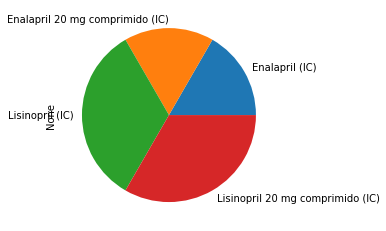

In [661]:
p_s.plot.pie()

In [ ]:
#Paso a DataFrame los farmacos recomendados
x = dict(p_s)
data = pd.Series(x).reset_index(name='Frecuencia').rename(columns={'index':'Farmaco'})
data

# CHEBYSHEV

In [726]:
distancia = pdist(pacientes_t.T, 'chebyshev')
distancia_matrix = squareform(distancia)
distancia = pd.DataFrame(1/(1 + distancia_matrix), index=pacientes_t.columns, columns=pacientes_t.columns)
distancia.head()

,1528,8380,8380,8380,8380,11480,11480,12356,12356,13322,...,1040975,1041706,1042204,1043274,1043610,1044359,1046662,1046774,1047527,1047712
1528,1.000000,0.090909,0.111111,0.125,0.142857,0.333333,0.500000,0.142857,0.200000,0.250000,...,0.500000,0.066667,0.333333,0.066667,0.083333,0.500000,0.038462,0.034483,0.040000,0.200000
8380,0.090909,1.000000,0.333333,0.250,0.200000,0.111111,0.100000,0.200000,0.142857,0.125000,...,0.090909,0.200000,0.111111,0.040000,0.500000,0.100000,0.027778,0.052632,0.066667,0.066667
8380,0.111111,0.333333,1.000000,0.500,0.333333,0.142857,0.125000,0.333333,0.200000,0.166667,...,0.111111,0.142857,0.142857,0.043478,0.250000,0.125000,0.029412,0.047619,0.058824,0.076923
8380,0.125000,0.250000,0.500000,1.000,0.500000,0.166667,0.142857,0.500000,0.250000,0.200000,...,0.125000,0.125000,0.166667,0.045455,0.200000,0.142857,0.030303,0.045455,0.055556,0.083333
8380,0.142857,0.200000,0.333333,0.500,1.000000,0.200000,0.166667,0.500000,0.333333,0.250000,...,0.142857,0.111111,0.200000,0.047619,0.166667,0.166667,0.031250,0.043478,0.052632,0.090909


In [727]:
#Escojo un paciente al que recomendarle 
pacient=pacientes[pacientes["Identificador de paciente"]==1046774]

In [728]:
#Seleciono los 3 pacientes mas afines a las circustancias de nuestro paciente según su proximidad.
similar = distancia[1046774].sort_values(ascending=False)[1:]
dic = dict(similar.head(3))


In [729]:
#Paso a lista los pacientes guias
guias= list(dic.keys())

In [730]:
#Visualizo los farmacos de los pacientes recomendados obteniendo solo las columnas de todos los tratamientos
#posibles
farma=pacientes.columns[-132:]
p_s = pacientes[pacientes["Identificador de paciente"].isin(guias)][farma]


In [731]:
#Aplico la funcion vacias, para eliminar todas las columnas
sin=vacias(p_s)
p_s.drop(sin,axis=1,inplace=True)


In [732]:
#Sumo los farmacos recomendados y ordenos de mas repetidos a menos
p_s = p_s.sum()
p_s.sort_values(axis=0,ascending=False)

Carvedilol 6,25 mg comprimido (IC)                  6
Carvedilol (IC)                                     6
Amlodipino (IC)                                     4
Valsartán/Amlodipino 160 mg/5 mg comprimido (IC)    4
Valsartán + amlodipino (IC)                         4
Valsartán (IC)                                      4
Bisoprolol 5 mg comprimido (IC)                     4
Bisoprolol (IC)                                     4
Atenolol 50 mg comprimido (IC)                      4
Atenolol (IC)                                       4
Furosemida (IC)                                     4
dtype: int64

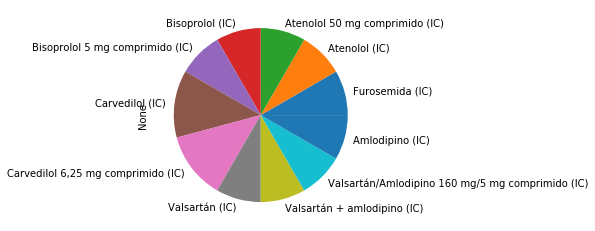

In [733]:

#Grafica de sectores para ilustrar las recomendaciones
p_s.plot.pie()


In [ ]:
#Paso a DataFrame los farmacos recomendados
x = dict(p_s)
data = pd.Series(x).reset_index(name='Frecuencia').rename(columns={'index':'Farmaco'})
data

#                                  CANBERRA

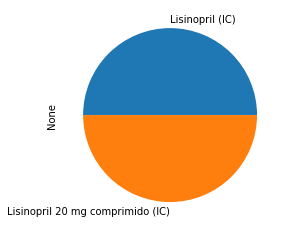

In [734]:

#Creo la matriz de recomendación
columnas=pacientes["Identificador de paciente"].tolist()
pacientes_t=pacientes.T
pacientes_t.columns = columnas
pacientes_t.drop(["Identificador de paciente"],axis=0,inplace=True)

#Probando el modelo chebyshev para evaluar si presenta unas recomendaciones
#mejores que el anterior.
distancia = pdist(pacientes_t.T, 'canberra')
distancia_matrix = squareform(distancia)
distancia = pd.DataFrame(1/(1 + distancia_matrix), index=pacientes_t.columns, columns=pacientes_t.columns)

#Escojo un paciente al que recomendarle
pacient=pacientes[pacientes["Identificador de paciente"]==1046774]

#Seleciono los 3 pacientes mas afines a las circustancias de nuestro paciente según su proximidad.
similar = distancia[1046774].sort_values(ascending=False)[1:]
dic = dict(similar.head(3))

#Paso a lista los pacientes guias
guias= list(dic.keys())

#Visualizo los farmacos de los pacientes recomendados obteniendo solo las columnas de todos los tratamientos
#posibles
farma=pacientes.columns[-132:]
p_s = pacientes[pacientes["Identificador de paciente"].isin(guias)][farma]

#Aplico la funcion vacias, para eliminar todas las columnas
sin=vacias(p_s)
p_s.drop(sin,axis=1,inplace=True)

#Sumo los farmacos recomendados y ordenos de mas repetidos a menos
p_s = p_s.sum()
p_s.sort_values(axis=0,ascending=False)

#Grafica de sectores para ilustrar las recomendaciones
p_s.plot.pie()

In [781]:
#Paso a DataFrame los farmacos recomendados
x = dict(p_s)
data = pd.Series(x).reset_index(name='Frecuencia').rename(columns={'index':'Farmaco'})
data

,Farmaco,Frecuencia
0,Lisinopril (IC),5
1,Lisinopril 20 mg comprimido (IC),5
